In [1]:
from evaluation import *
import torch
import utils
from esm import pretrained
%load_ext autoreload
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
eval_esm=pd.read_csv('/Users/guillaumebelissent/Docs/EPFL/MA/ML/model_evaluation_esm.csv')
eval_esm['Name']=eval_esm['Name'].apply(lambda x: 'esm_8M' if x==0 else 'esm_35M')
eval=pd.concat([eval_esm,pd.read_csv('/Users/guillaumebelissent/Docs/EPFL/MA/ML/ml-project-2-byte-by-byte/model_evaluation_HM.csv')])

In [3]:
def blosum62_matrix():
    """
    Defines and normalizes by column the BLOSUM62 matrix from the blosum62.csv file and returns it as a PyTorch tensor.
    
    Parameters
    ----------
    None 

    Returns
    -------
    torch.Tensor
        BLOSUM62 matrix as a tensor.
    """
    blosum62_df = pd.read_csv('blosum62.csv', delimiter=";", header = None)
    blosum62_df.columns=['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
    blosum62_df.index=['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
    # Normalization by column
    for column in blosum62_df.columns: 
        blosum62_df[column] = (blosum62_df[column] - blosum62_df[column].min()) / (blosum62_df[column].max() - blosum62_df[column].min())     
    return blosum62_df
blosum62=blosum62_matrix()

/var/folders/6_/6g10b43x17ngwmk4l9msb2mc0000gn/T/ipykernel_60370/2076906166.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(eval[eval['Name']!='BERT_depth4_embed512_steps2000_v2'],x='Name',y='Correct',
/var/folders/6_/6g10b43x17ngwmk4l9msb2mc0000gn/T/ipykernel_60370/2076906166.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_eval['Blosum62'] = filtered_eval.apply(
/var/folders/6_/6g10b43x17ngwmk4l9msb2mc0000gn/T/ipykernel_60370/2076906166.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

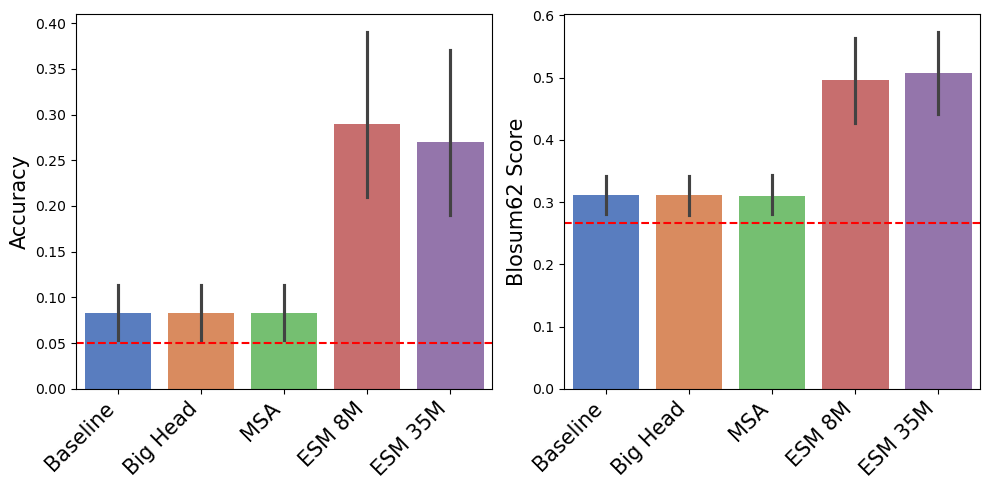

In [4]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
sns.barplot(eval[eval['Name']!='BERT_depth4_embed512_steps2000_v2'],x='Name',y='Correct',
            order=['BERT_depth4_embed256_steps2000','BERT_depth4_embed256_head16_steps1000','BERTMSA_depth4_embed256_head8_steps2000','esm_8M','esm_35M'],
            ax=ax1, palette='muted')
ax1.set_xticks(np.arange(5))
ax1.set_xticklabels(labels=['Baseline','Big Head','MSA','ESM 8M','ESM 35M'], rotation=45, ha='right', size=15)
ax1.set_xlabel('')
ax1.set_ylabel('Accuracy',size=15)
ax1.axhline(y=1/20, color='red', linestyle='--', label='Chance')

aa = ["A", "R", "N", "D", "C", "Q", "E", "G", "H", "I","L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"]
filtered_eval = eval[(eval['Prediction'].isin(aa)) & (eval['Label'].isin(aa))]
filtered_eval['Blosum62'] = filtered_eval.apply(
    lambda row: blosum62.loc[row['Prediction'], row['Label']], axis=1
)
sns.barplot(filtered_eval,x='Name',y='Blosum62', palette='muted',
            order=['BERT_depth4_embed256_steps2000','BERT_depth4_embed256_head16_steps1000','BERTMSA_depth4_embed256_head8_steps2000','esm_8M','esm_35M'],ax=ax2)
ax2.set_xticks(np.arange(5))
ax2.set_xticklabels(labels=['Baseline','Big Head','MSA','ESM 8M','ESM 35M'], rotation=45, ha='right', size=15)
ax2.set_xlabel('', size=15)
ax2.set_ylabel('Blosum62 Score',size=15)
ax2.axhline(y=blosum62.mean(axis=None), color='red', linestyle='--', label='Chance')
plt.tight_layout()
plt.show()

